![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Teste 2: funções inversas

Neste teste, iremos analisar a função $f(x) = x e^x$, para construir a função inversa $g(y) = x$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import math

# Questão 1: Análise da função

## 1.1 Gráfico

Em geral, uma boa forma de analisar uma função é fazendo o gráfico dela.

Faça um gráfico de $f$ no intervalo $[-4,1]$. Também indique:
- um título; e
- dê nome aos eixos.

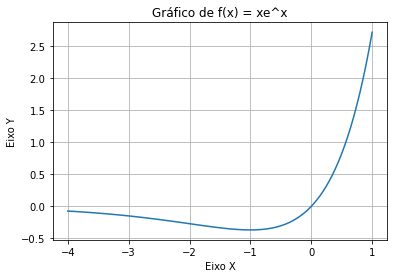

In [3]:
x = np.linspace(-4,1,100)

y = x*(math.e**x)
    
ax = plt.gca()
ax.set(xlabel='Eixo X', ylabel='Eixo Y',
       title='Gráfico de f(x) = xe^x')
plt.plot(x,y)
plt.grid()
plt.show()

In [4]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

In [5]:
valores = ax.lines[0].get_ydata()
a, b = min(valores), max(valores)
assert np.isclose(a, -0.36787944117144, atol=1e-4)
assert np.isclose(b, 2.718281828459045, atol=1e-4)

In [6]:
ax = None

## 1.2: Mínimos e Máximos

Se uma função troca a direção de crescimento, isso muda a análise das raízes.
Portanto, é importante saber onde estão os máximos e mínimos locais de $f$.

Calcule (analiticamente) a derivada de $f$, e indique o(s) ponto(s) em que ela se anula.

São pontos de máximo ou de mínimo?

f(x) = x*(e^x)

Derivando:

f'(x) = x*(e^x) + e^x

Igualando a 0:

x*(e^x) + e^x = 0

e^x * (x + 1 ) = 0

Ou e^x = 0 - > x = -∞

Ou x + 1 = 0 - > x = -1


Temos na função 1 ponto de mínimo, (-1, -1/e). Onde a derivada de f(x) se anula.

Agora, faça uma figura com dois gráficos:
- No primeiro, o gráfico da derivada de $f$ no mesmo intervalo $[-4, 1]$;
- Ao lado, um "zoom" em uma região que você considere importante.

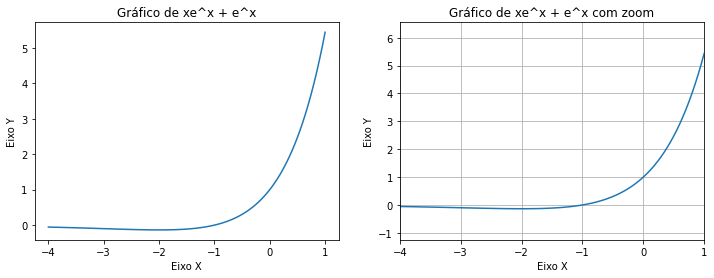

In [7]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(12,4))


y = x*(math.e**x) + math.e**x

ax1.plot(x,y)
ax1.set(xlabel='Eixo X', ylabel='Eixo Y',
       title='Gráfico de xe^x + e^x')

ax2.plot(x,y)
ax2.set(xlabel='Eixo X', ylabel='Eixo Y',
       title='Gráfico de xe^x + e^x com zoom')

ax2.margins(0,0.2)
plt.grid()
plt.show()

Como estes gráficos ajudam a confirmar os mínimos e máximos que você calculou?

Dando zoom na região, é possivel perceber melhor como a raiz da derivada realmente está em -1, e como a derivada era antes negativa e depois ficou positiva, sabemos que é um ponto de mínimo.

## 1.3: Número de raízes

Usando a informação da derivada da função, seus maximo(s) e minimo(s), responda: 

Quantas raizes a equação $f(x) = y$ tem para cada valor de $y$?

Como sabemos que (-1,-1/e) é um ponto de mínimo. Sabemos que somando 1/e a f(x), teremos o ponto mínimo da equação colidindo com o Eixo X, e assim teremos apenas uma raiz, o próprio ponto mínimo.

Então se tivermos um y < -1/e: f(x) terá 0 raízes,

Então se tivermos um y = -1/e: f(x) terá 1 raízes,

Então se tivermos um y > -1/e: f(x) terá 2 raízes.


# Questão 2: Construindo a função inversa

A maior dificuldade de usar a bisseção para construir a função inversa é que precisamos de um intervalo onde a raiz estará.

## 2.1: Gráficos para limitar a bisseção

Faça um gráfico das funções $x e^x$ e $e^x$ e veja que,
para $y$ suficientemente grande,
a raiz estará sempre abaixo de $\log y$.
Isso permite achar um limite superior para um intervalo de bisseção.

Escolha um intervalo razoável para o gráfico, que ajude a observar quão "grande" $y$ deve ser.

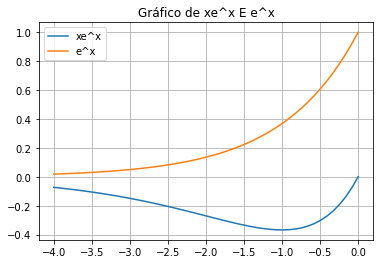

In [8]:
x2 = np.linspace(-4,np.log(1))


y1 = x2*(math.e**x2)
y2 = math.e**x2


plt.plot(x2,y1, label='xe^x')
plt.plot(x2,y2, label='e^x')

plt.grid()
plt.legend()

ax = plt.gca()
ax.set_title('Gráfico de xe^x E e^x')

plt.show()

In [9]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.title.get_text() != ""

Agora, falta estudar o que acontece quando $x \to -\infty$.

Faça o gráfico de $f$ e o de $1/x$ para $x \in [-4, -1]$.

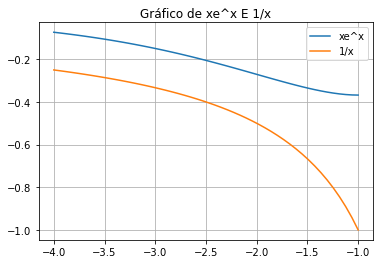

In [10]:
x3 = np.linspace(-4,-1)


y3 = x3*(math.e**x3)
y4 = 1/x3


plt.plot(x3,y3, label='xe^x')
plt.plot(x3,y4, label='1/x')

plt.grid()
plt.legend()

ax = plt.gca()
ax.set_title('Gráfico de xe^x E 1/x')

plt.show()



Explique porque (usando o gráfico e outras contas, se você julgar necessário),
quando $f(x) = y$ tem uma raiz "muito negativa",
esta raiz é menor (em valor absoluto) do que a raiz de $1/x = y$.

Como é possível ver pelo gráfico, f(x) chegará a 0 "mais rápido" que 1/x, por isso podemos considerar que esta raiz é menor, em valor absoluto, do que a raiz de 1/x.

## 2.2: A função inversa propriamente dita

Agora, programe a função inversa de $f$ (chamada $g$),
que retorne **todas** as soluções de $f(x) = y$ em uma lista.

Se não houver raízes, retorne a lista vazia.

In [11]:
def bisseção(f, a, b , xtol=1e-10, ytol=1e-10, maxiter=100000):
    i = 0
    while i < maxiter:
        i+=1 # Contador
        media = (a+b)/2
        if (np.isclose(f(media), 0)) or (abs(b-a) < xtol):
            return media
        if np.sign(f(a)) == np.sign(f(media)):
            a = media  
        else:
            b = media
    return media

In [12]:

def f(x):
    return x * np.e**x 

def g(y, xtol=1e-8, ytol=1e-8):
    
 

    f = lambda x: x * np.e**x - y
    r1 = bisseção(f = f, a = 1/y, b = -1 , xtol= xtol, ytol= ytol, maxiter=10000)
    
    if y >= math.e:
    
        r2 = bisseção(f = f, a= -1, b = np.log(abs(y)) + 10  , xtol = xtol, ytol= ytol, maxiter=10000)
    else:
        r2 = bisseção(f = f, a= -1, b = math.e  , xtol = xtol, ytol= ytol , maxiter=10000)
        
    print(r1,r2)
    print(f(r2))
    lista = []
    if np.isclose(f(r1) + y ,y):
        lista.append(r1)
    if np.isclose(f(r2) + y ,y):
        lista.append(r2)
    print(lista)
    return lista 

In [13]:
r1 = g(1)[0]
assert np.isclose(r1, 0.5671432904097838)
assert np.isclose(f(r1), 1)

0.5671432912349701 0.5671432914569395
2.8935243090444374e-09
[0.5671432912349701, 0.5671432914569395]


In [14]:
assert g(-1) == []

-1.0 2.718281824996125
42.19355547958811
[]


In [15]:
r1, r2 = g(-0.1)
assert np.isclose(f(r1), -0.1)
assert np.isclose(f(r2), -0.1)
assert abs(r1 - r2) > 1

-3.577151983976364 -0.11183255837328884
6.239776612071424e-10
[-3.577151983976364, -0.11183255837328884]


In [16]:
r1 = g(200)[0]
assert np.isclose(f(r1), 200)

-0.9999999962560833 3.92974326893866
3.363044243087643e-08
[3.92974326893866]


# Questão 3:  Mudança de Variaveis

Vamos modificar um pouco nossa equação $x e^x = y$.

Para cada um dos casos, ache as raízes a partir de uma mudança de variáveis para transformar a equação em algo da forma

$$ u e^u = t. $$
**Escreva sempre qual foi a mudança de variaveis feita**, relacionando $t$ com $y$ e $u$ com $x$.

Dica: Ache uma mudança de variáveis "na mão" para as funções,
utilize o código da questão anterior para descobrir as raízes "transformadas" $u$,
e depois volte para as variáveis $x$

## 3.1: Expoentes diferentes

Resolva $x e^{2x} = 7$

x*(e^2x) - 7

Percebemos fazendo a mudança de variáveis com u, que:

- u = 2x

Agora precisamos encontrar a variável t :

u/2 * (e^u) = 7

u * (e^u) = 14

u * (e^u) = t


- t = 14





In [17]:
# Dê a resposta da forma $x = ...$
# YOUR CODE HERE

t = 14
#u = 2x
x = g(t)[0]/2

-0.9999999960086176 1.964049110718145
-5.3482335005128334e-08
[1.964049110718145]


In [18]:
assert np.isclose(x * np.exp(2*x), 7)

## 3.2: Parte linear diferente

Encontre as duas raízes de $(x  + 1) e^{x} = -\frac{1}{10}$.

(x+1)*(e^x) = -1/10


Percebemos fazendo a mudança de variáveis com u, que:

- x = = u - 1

Agora precisamos encontrar a variável t :

(u)*(e^u-1) = -1/10

(u)*(e^u/e^1) = -1/10


(u)*(e^u) = -e/10

u * (e^u) = t


- t = -e/10

In [19]:
# Dê a resposta da forma $x1, x2 = ...$

t = -1*(math.e/10)
# u = x + 1

x1 = g(t)[0] - 1
x2 = g(t)[1] - 1

-1.9914461386263098 -0.40931508597432453
8.46899655959632e-09
[-1.9914461386263098, -0.40931508597432453]
-1.9914461386263098 -0.40931508597432453
8.46899655959632e-09
[-1.9914461386263098, -0.40931508597432453]


In [20]:
assert np.isclose((x1+1)*np.exp(x1), -0.1)
assert np.isclose((x2+1)*np.exp(x2), -0.1)
assert abs(x1 - x2) > 1

## 3.3: Mudança genérica de variáveis

Para resolver a equação

$$(x + a)e^{bx} = c, \quad \text{com $b \neq 0$},$$

podemos fazer uma mudança de variáveis (em função de $a$ e $b$)
para transformar em uma equação $u e^u = t$.

Explique qual é a mudança a ser feita.

(x + a)* e^(bx) = c

u = b*(x+a)

(u/b) * e^(u - b*a) = c

u * e^(u - b*a) = (c * b)

u * e^u/(e^b*a) = (c * b)

u * e^u = (c * b) * (e^b*a)

Agora, faça um programa que recebe os parâmetros $a$, $b$ e $c$
e retorna uma lista com as soluções.

Dica: use uma _list comprehension_  para fazer a transformação inversa.

In [21]:
def solução_geral(a,b,c):
    """Soluções da equação (x+a)e^{bx} = c"""
    
   
    print((c * b) * ((math.e)**(b*a)))
    assert b != 0 
    raizes = g((c * b) * (math.e**(b*a)))
    
    return [(u/b) - a for u in raizes]
    

Testes

In [22]:
def geral(x, a, b):
    return (x+a)*np.exp(b*x)

In [23]:
r1 = solução_geral(0, 1, 2)[0]
assert np.isclose(geral(r1, 0, 1), 2)

2.0
-0.9999999972060323 0.852605501511755
-2.181438807369318e-09
[0.852605501511755]


In [24]:
r1 = solução_geral(3, 2, 2)[0]
assert np.isclose(geral(r1, 3, 2), 2)

1613.71517397094
-0.9999999962724012 5.653941454766958
-2.89268473352422e-06
[5.653941454766958]


In [25]:
r1 = solução_geral(-1, -1, -1)[0]
assert np.isclose(r1, 0)

2.718281828459045
-0.999999997452126 1.0000000009313226
5.063194308263519e-09
[1.0000000009313226]


In [26]:
r1, r2 = solução_geral(-4, -1, 0.005)
assert np.isclose(geral(r1, -4, -1), 0.005)
assert np.isclose(geral(r2, -4, -1), 0.005)
assert np.abs(r1 - r2) > 1

-0.27299075016572116
-1.9828551540462556 -0.4122906482981864
8.370373283383969e-10
[-1.9828551540462556, -0.4122906482981864]


# Questão 4: Uma outra função... (Bônus)

Vamos aplicar o mesmo raciocínio das questões anteriores para uma função um pouco diferente. 

Faça o gráfico da função $h(x) = x - \log(x)$.

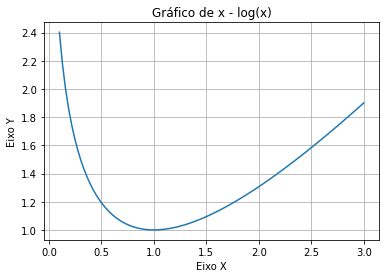

In [27]:
x = np.linspace(0.1,3,100)

y = x - np.log(x)
    
ax = plt.gca()
ax.set(xlabel='Eixo X', ylabel='Eixo Y',
       title='Gráfico de x - log(x)')
plt.plot(x,y)
plt.grid()
plt.show()

Ao variar o y, o que acontecerá com o número de raízes?
Essa função pode ter mais de 2 raizes?

Fazendo a mesma análise que fizemos em uma questão anterior, podemos perceber que o ponto mínimo da função é o (1,1).

Sendo assim, a função com:

y < 1: Terá 0 raízes

y = 1: Terá 1 raízes

y > 1: Terá 2 raízes

